#ProjectTitle:MarketingCampaignPerformanceInsights


In [1]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset file
df = pd.read_csv('marketing_campaign.csv')

# Descriptive Analysis

Basic Structure

In [3]:
#Print the first few rows of the dataset to get an overview of the data.
df.head(5)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [4]:
#Obtain the number of rows and columns in the dataset.
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 22029
Number of columns: 16


In [5]:
#Get a concise summary of the dataset, including the data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [6]:
#Generate descriptive statistics for numerical columns.
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


# Data exploration

In [7]:
#Print the number of unique Campaign_IDvalues in the dataset
unique_campaign_ids = df['Campaign_ID'].nunique()
print(f"Number of unique Campaign_ID values: {unique_campaign_ids}")

Number of unique Campaign_ID values: 22029


In [8]:
#List the unique values of the Location and Customer_Segment columns.
unique_locations = df['Location'].unique()
unique_customer_segments = df['Customer_Segment'].unique()

print("Unique Locations:")
print(unique_locations)

print("\nUnique Customer Segments:")
print(unique_customer_segments)

Unique Locations:
['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']

Unique Customer Segments:
['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


In [9]:
#Count the occurrences of each category in the Campaign_Type and Channel_Used and columns
campaign_type_counts = df['Campaign_Type'].value_counts()
print (campaign_type_counts)


channel_used_counts = df['Channel_Used'].value_counts()
print (channel_used_counts)

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64
Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


#Exploratory Data Analysis (EDA) and Visualization

Campaign Performance:


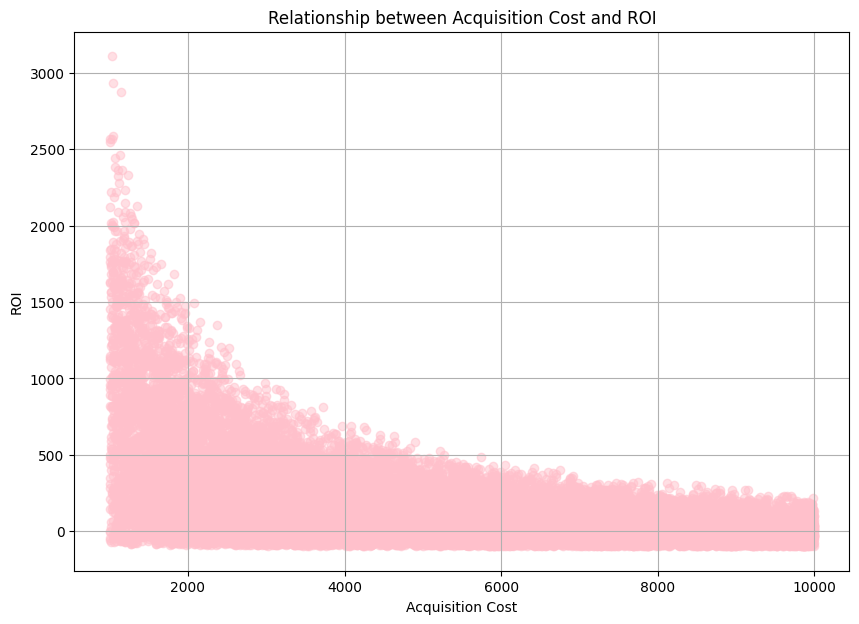

In [11]:
#Plot a scatter plot to visualize the relationship between Acquisition_Cost and ROI
plt.figure(figsize=(10, 7))
plt.scatter(df['Acquisition_Cost'], df['ROI'],color='pink',alpha=0.5)
plt.title('Relationship between Acquisition Cost and ROI')
plt.xlabel('Acquisition Cost')
plt.grid(True)
plt.ylabel('ROI')
plt.show()

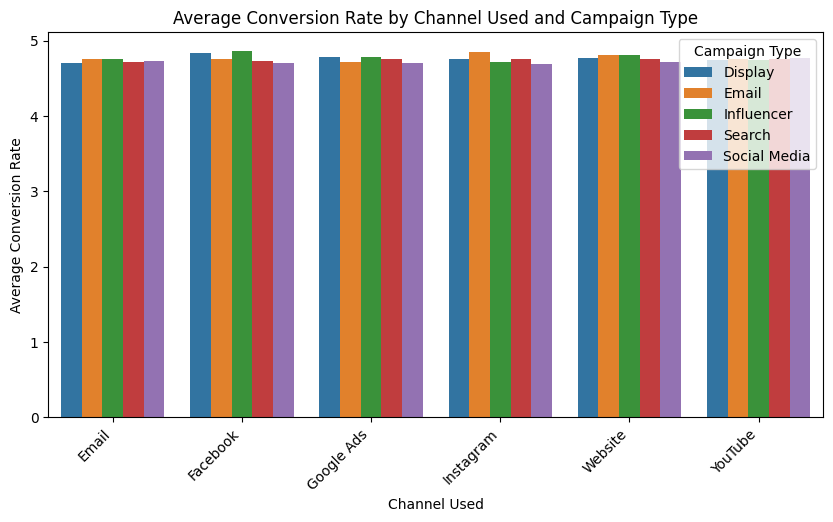

In [12]:
#Create a bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Ty
average_conversion_rate = df.groupby(['Channel_Used', 'Campaign_Type'])['Conversion_Rate'].mean().reset_index()
# Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=average_conversion_rate)
plt.title('Average Conversion Rate by Channel Used and Campaign Type')
plt.xlabel('Channel Used')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Campaign Type')
plt.show()

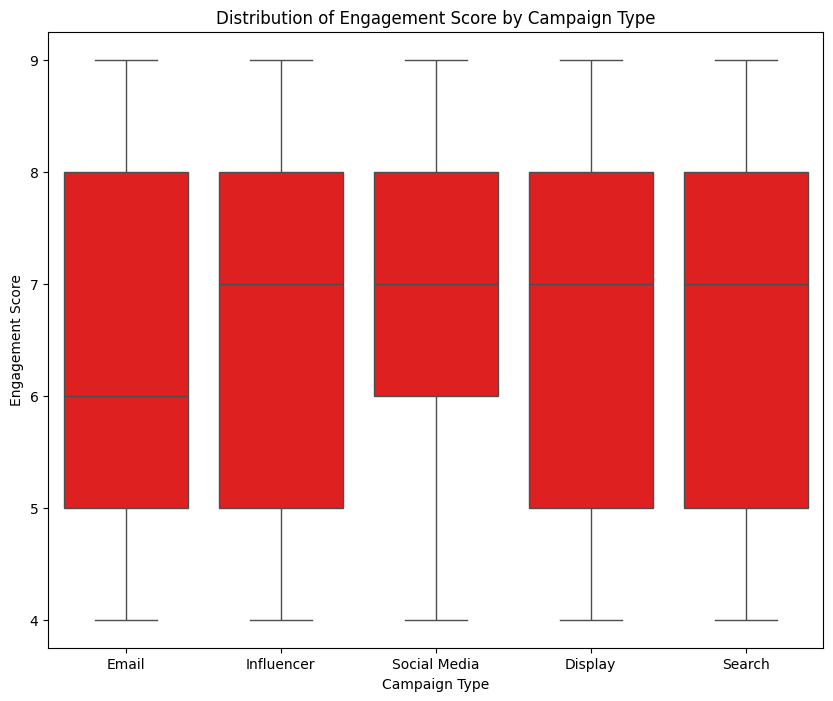

In [13]:
# Visualize the distribution of Engagement_Score across different Campaign_Typeusing a box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Campaign_Type', y='Engagement_Score',color='red',data=df)
plt.title('Distribution of Engagement Score by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Engagement Score')
plt.show()

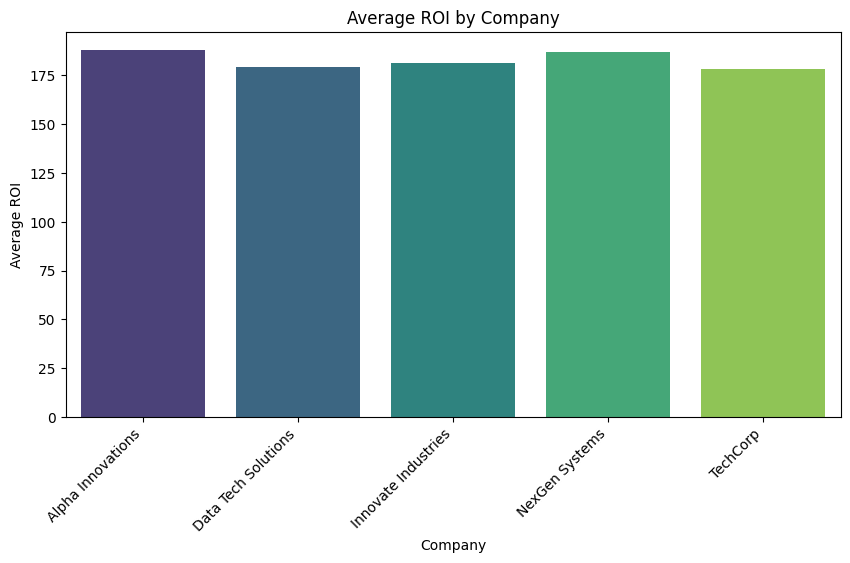

In [14]:
#Analyze the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies
average_roi_by_company = df.groupby('Company')['ROI'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Company', y='ROI',data=average_roi_by_company, palette='viridis')
plt.title('Average ROI by Company')
plt.xlabel('Company')
plt.ylabel('Average ROI')
plt.xticks(rotation=45, ha='right')
plt.show()

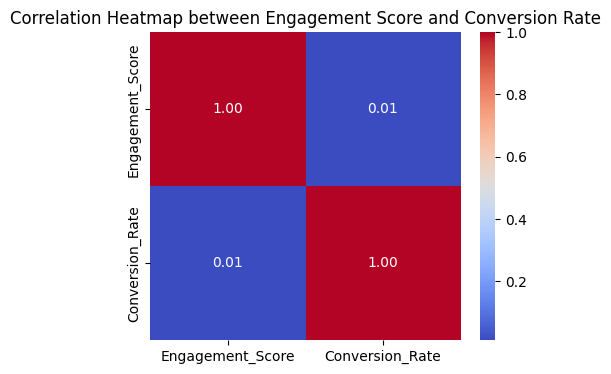

In [15]:
# Examine the correlation between Engagement_Score and Conversion_Rate using a heatmap
correlation_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Engagement Score and Conversion Rate')
plt.show()

#  Customer Segmentation

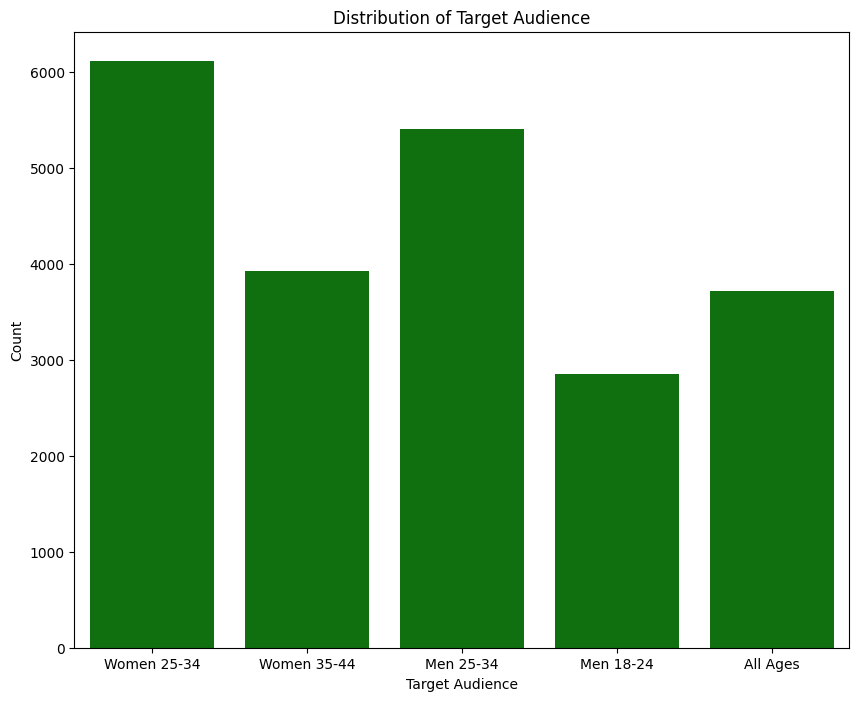

In [16]:
# Create a count plot to visualize the distribution of Target_Audience
plt.figure(figsize=(10, 8))
sns.countplot(x='Target_Audience',color='green', data=df)
plt.title('Distribution of Target Audience')
plt.xlabel('Target Audience')
plt.ylabel('Count')
plt.show()

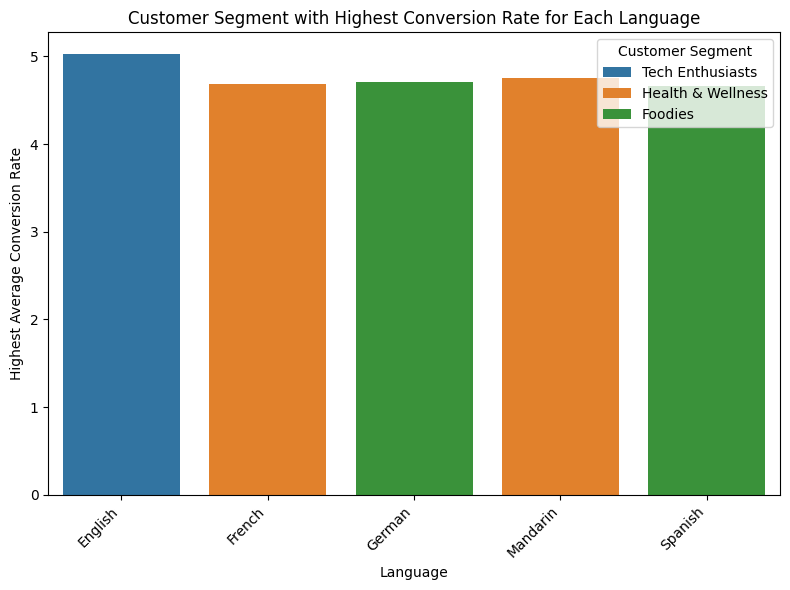

In [17]:
# Identify which Customer_Segment has the highest Conversion_Rate for each Languageusing a bar chart
average_conversion_rate_by_segment = df.groupby(['Customer_Segment', 'Language'])['Conversion_Rate'].mean().reset_index()
highest_conversion_by_language = average_conversion_rate_by_segment.loc[average_conversion_rate_by_segment.groupby('Language')['Conversion_Rate'].idxmax()]

plt.figure(figsize=(8, 6))
sns.barplot(x='Language', y='Conversion_Rate', hue='Customer_Segment', data=highest_conversion_by_language)
plt.title('Customer Segment with Highest Conversion Rate for Each Language')
plt.xlabel('Language')
plt.ylabel('Highest Average Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

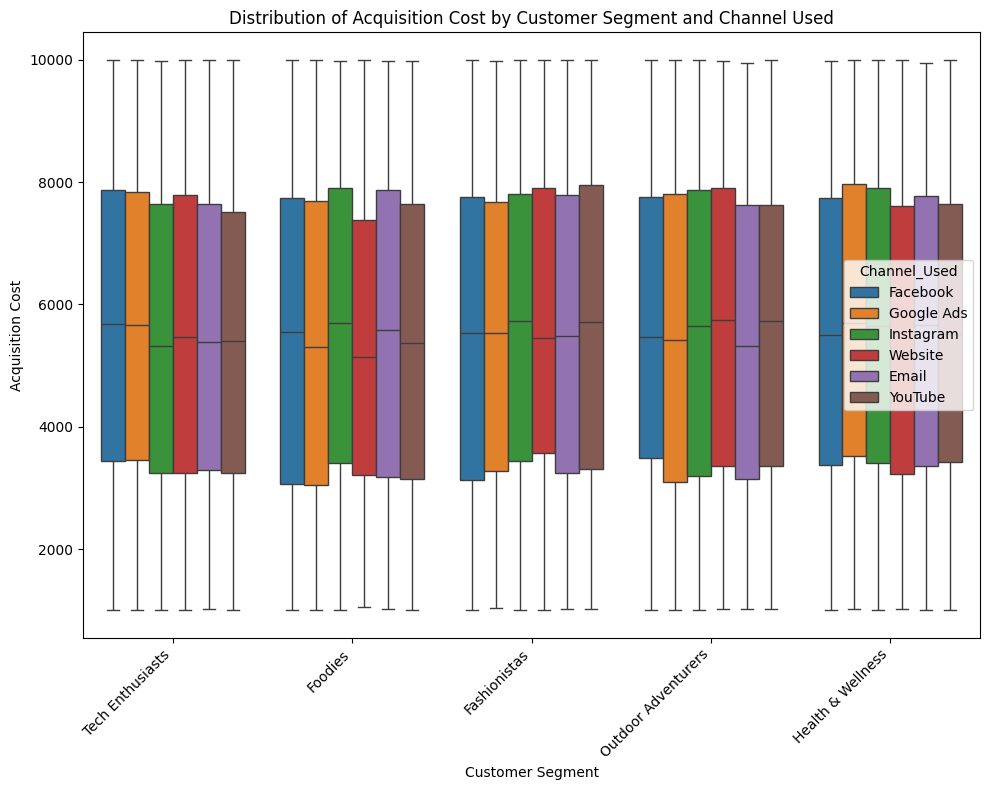

In [18]:
# Visualize the distribution of Acquisition_Cost across each Customer_Segment,categorized by Channel_Used, using a box plot.
plt.figure(figsize=(10, 8))
sns.boxplot(x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used', data=df)
plt.title('Distribution of Acquisition Cost by Customer Segment and Channel Used')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

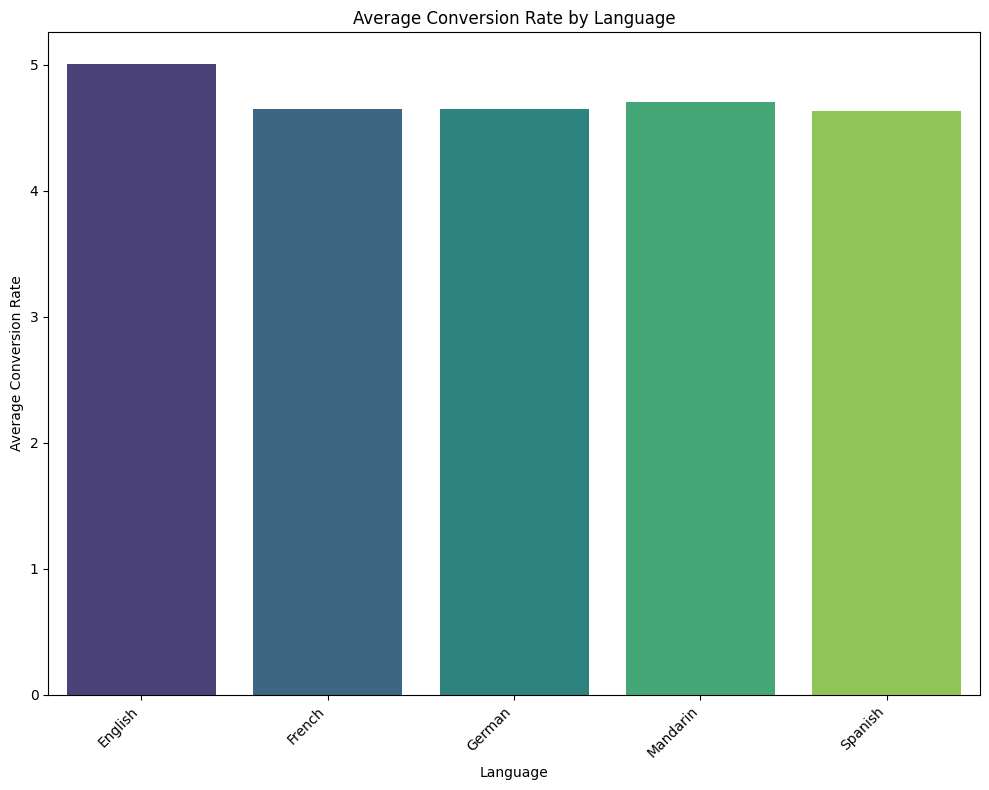

In [19]:
#Analyze average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages.

average_conversion_rate_by_language = df.groupby('Language')['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='Language', y='Conversion_Rate', data=average_conversion_rate_by_language, palette='viridis')
plt.title('Average Conversion Rate by Language')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Channel Effectiveness

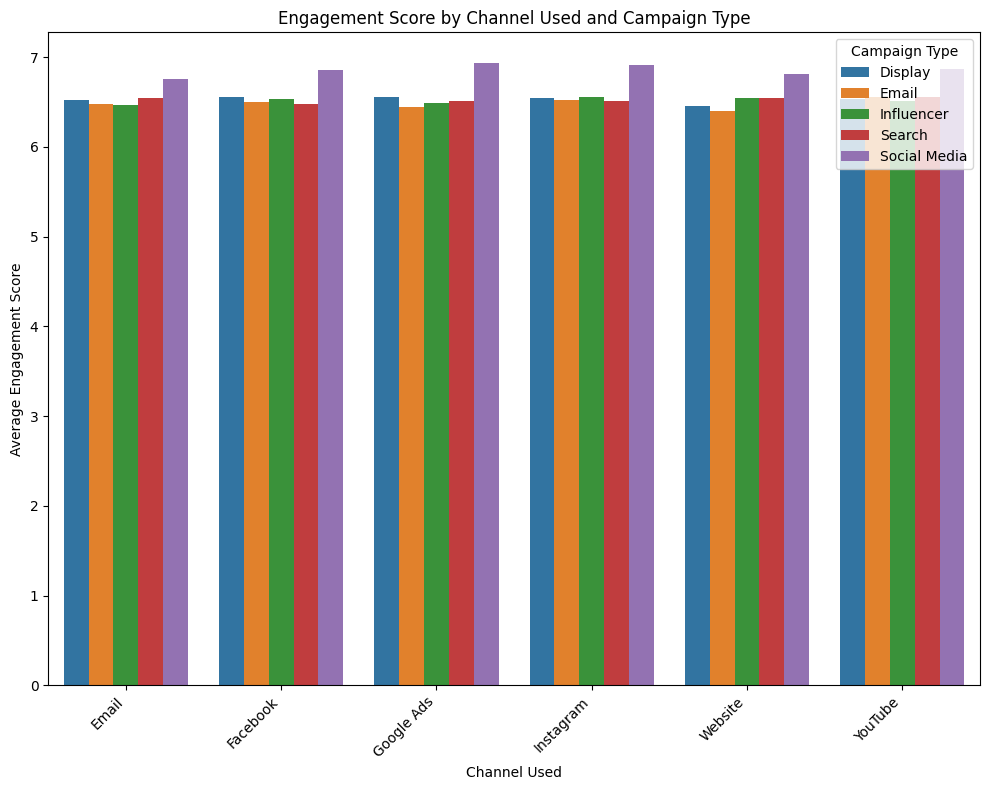

In [20]:
#Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart

engagement_score_by_channel = df.groupby(['Channel_Used', 'Campaign_Type'])['Engagement_Score'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', data=engagement_score_by_channel)
plt.title('Engagement Score by Channel Used and Campaign Type')
plt.xlabel('Channel Used')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Campaign Type')
plt.tight_layout()
plt.show()

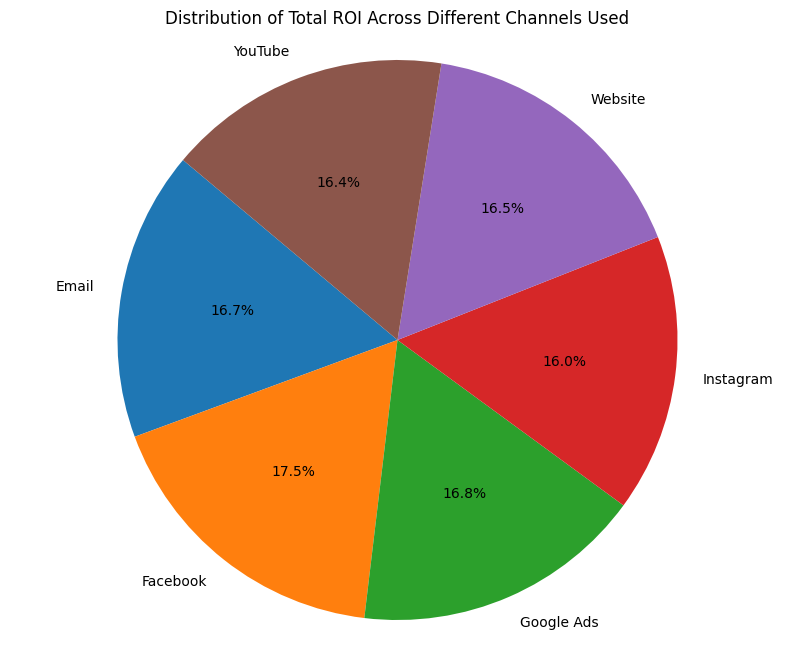

In [21]:
#Show the distribution of total ROI across different Channels_Used using a pie chart
total_ROI_by_channel = df.groupby('Channel_Used')['ROI'].sum()

plt.figure(figsize=(10, 8))
plt.pie(total_ROI_by_channel, labels=total_ROI_by_channel.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total ROI Across Different Channels Used')
plt.axis('equal')
plt.show()

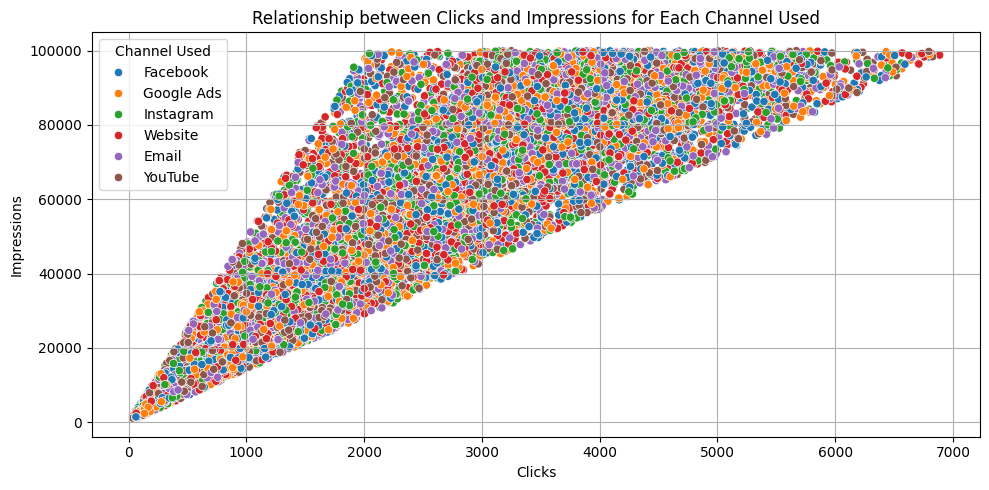

In [22]:
# Plot a scatter plot to show the relationship between Clicks and Impressions for each Channel_Used

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Clicks', y='Impressions', hue='Channel_Used', data=df)
plt.title('Relationship between Clicks and Impressions for Each Channel Used')
plt.xlabel('Clicks')
plt.ylabel('Impressions')
plt.legend(title='Channel Used')
plt.grid(True)
plt.tight_layout()
plt.show()

# Time-based analysis

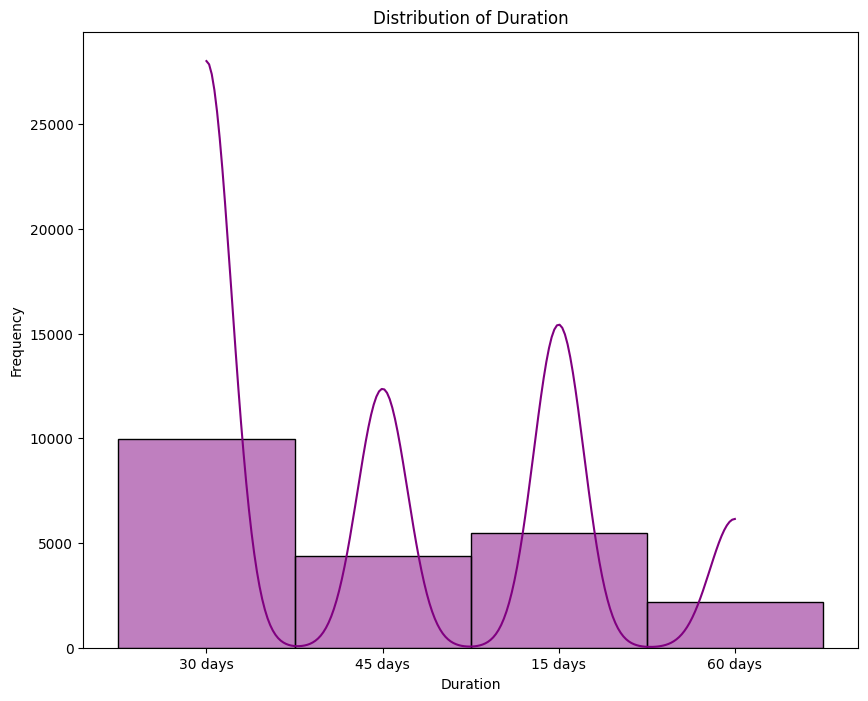

In [23]:
# Plotthedistribution of Duration using a histogram

plt.figure(figsize=(10, 8))
sns.histplot(df['Duration'], bins=20, kde=True, color='purple')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

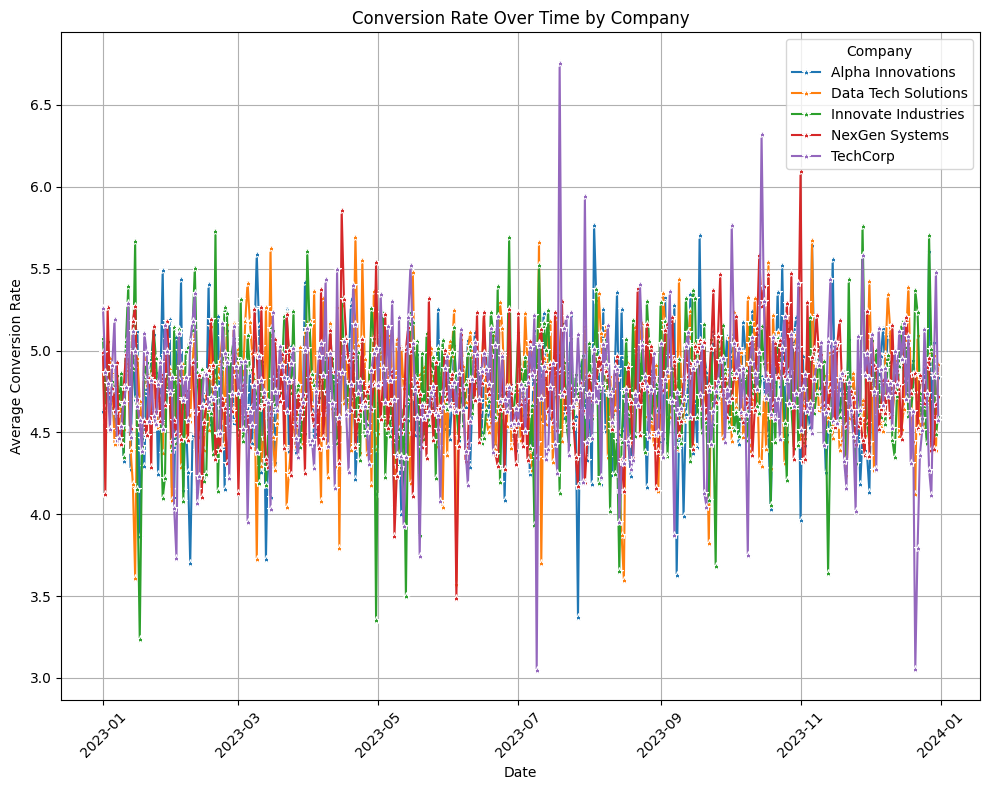

In [25]:
# Analyze how the overall Conversion_Rate has changed over Date for each Company using a line

company_conversion_rate_over_time = df.groupby(['Date', 'Company'])['Conversion_Rate'].mean().reset_index()

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
plt.figure(figsize=(10, 8))
sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', data=company_conversion_rate_over_time, marker='*')
plt.title('Conversion Rate Over Time by Company')
plt.xlabel('Date')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()

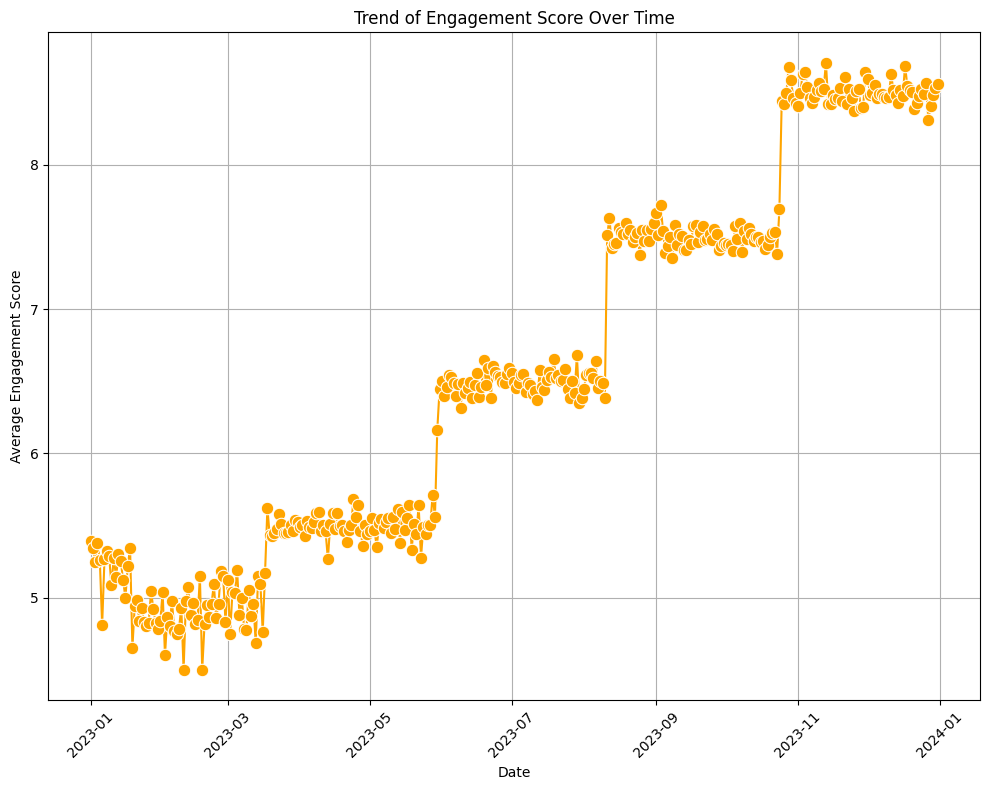

In [26]:
# Examine the trend of Engagement_Scoreover Date with a line chart
engagement_score_over_time = df.groupby('Date')['Engagement_Score'].mean().reset_index()

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
plt.figure(figsize=(10, 8))
sns.lineplot(x='Date', y='Engagement_Score',color='orange',data=engagement_score_over_time, marker='.',markersize=18)
plt.title('Trend of Engagement Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# geographic analysis

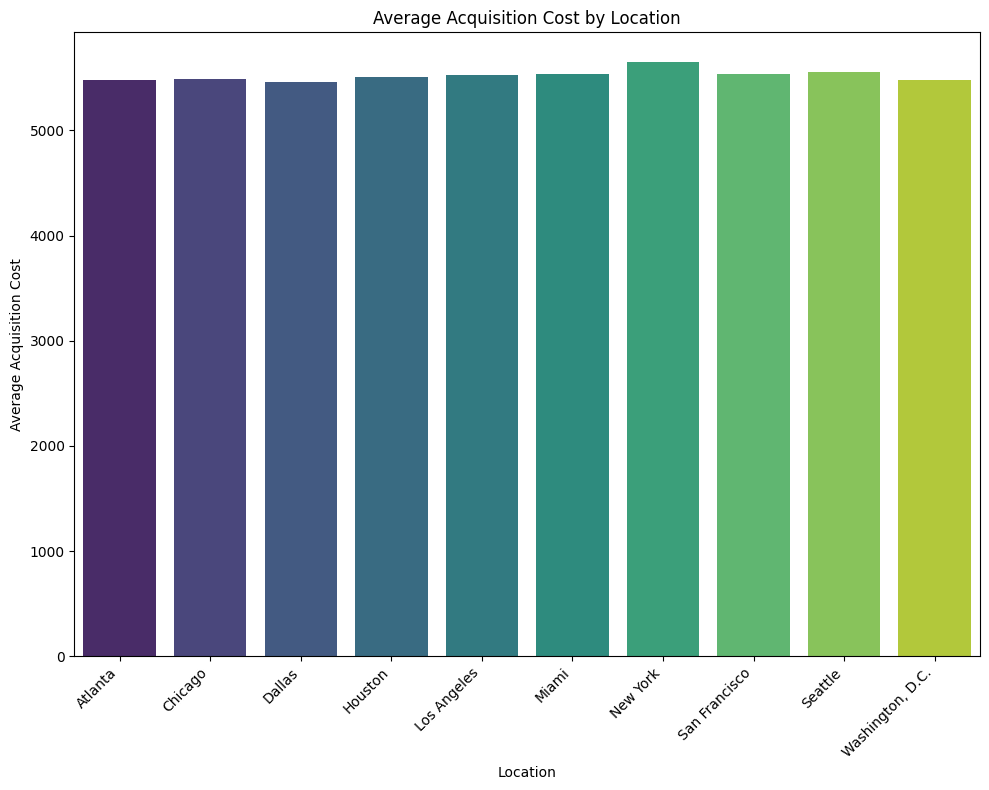

In [27]:
# Determinewhich location has the highest Acquisition_Cost using a bar chart.
highest_acquisition_cost_location = df.groupby('Location')['Acquisition_Cost'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='Location', y='Acquisition_Cost', data=highest_acquisition_cost_location, palette='viridis')
plt.title('Average Acquisition Cost by Location')
plt.xlabel('Location')
plt.ylabel('Average Acquisition Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

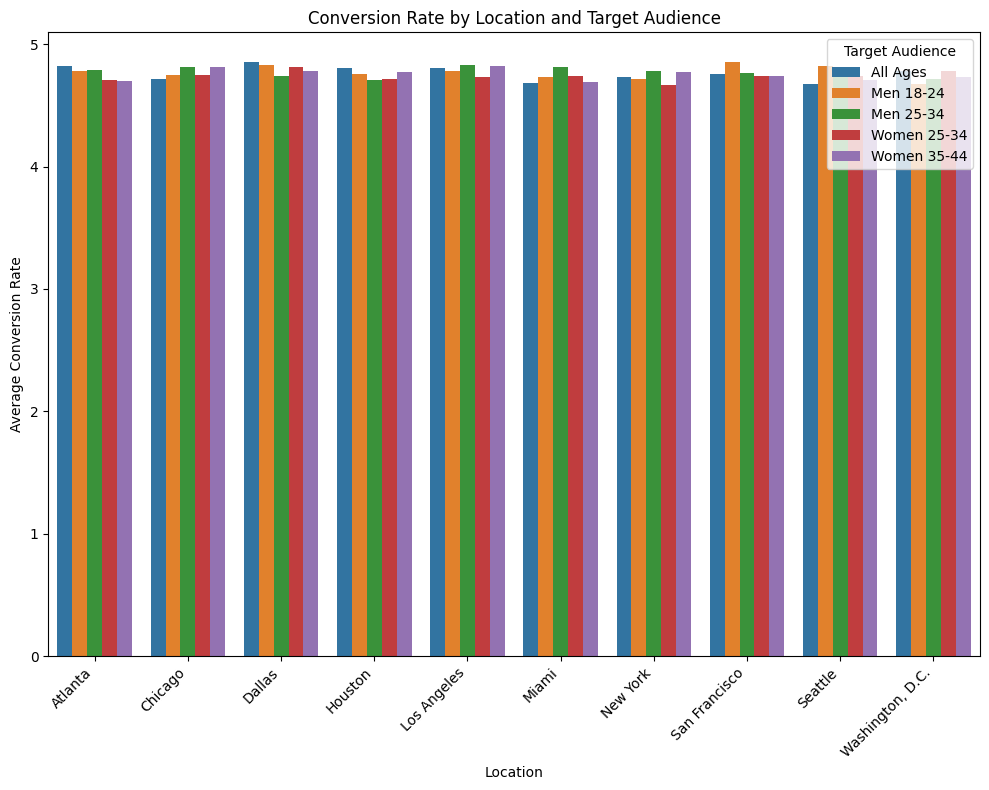

In [28]:
# Visualize the Conversion_Rate by different Location, categorized by Target_Audience, using a bar chart
conversion_rate_by_location = df.groupby(['Location', 'Target_Audience'])['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='Location', y='Conversion_Rate', hue='Target_Audience', data=conversion_rate_by_location)
plt.title('Conversion Rate by Location and Target Audience')
plt.xlabel('Location')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target Audience')
plt.tight_layout()
plt.show()

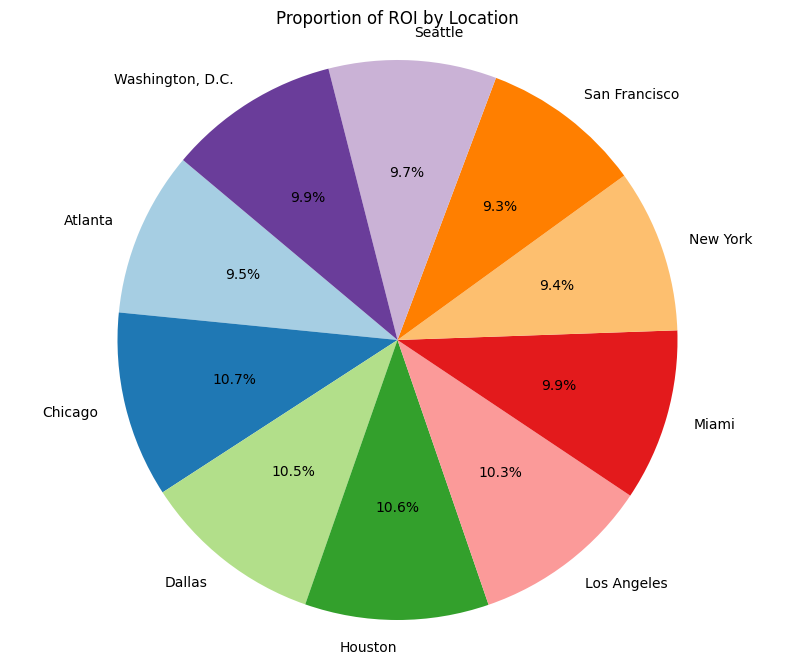

In [29]:
# Illustrate the proportion of ROI by Location using a pie chart
roi_by_location = df.groupby('Location')['ROI'].sum()

plt.figure(figsize=(10, 8))
plt.pie(roi_by_location, labels=roi_by_location.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of ROI by Location')
plt.axis('equal')
plt.show()